In [15]:
import os
import re
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

file_paths = [
    'C:/Users/Dev/Documents/GitHub/Dona_project/Example_chat_data/WhatsApp_Chat_with_Donna_Patterson.txt',
    'C:/Users/Dev/Documents/GitHub/Dona_project/Example_chat_data/WhatsApp_Chat_with_Dr._Heather_Hanson.txt',
    'C:/Users/Dev/Documents/GitHub/Dona_project/Example_chat_data/WhatsApp_Chat_with_Jeffery_Hill_.txt',
    'C:/Users/Dev/Documents/GitHub/Dona_project/Example_chat_data/WhatsApp_Chat_with_Michelle_Morris.txt',
    'C:/Users/Dev/Documents/GitHub/Dona_project/Example_chat_data/WhatsApp_Chat_with_Sherry_Flores.txt'
]

# Function to parse WhatsApp chat data and extract potential names
def extract_names_from_chats(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.readlines()

    names = set()
    for line in data:
        # Extracting sender names using regex
        match = re.match(r"\d{2}/\d{2}/\d{4}, \d{2}:\d{2} - (.*?): ", line)
        if match:
            sender = match.group(1)
            names.add(sender)

    return names

# Main function to extract names from all chat files
def identify_person(file_paths):
    potential_names = set()
    for path in file_paths:
        names = extract_names_from_chats(path)
        potential_names.update(names)

    return potential_names

# Extracting and printing the identified names
identified_names = identify_person(file_paths)
print("Identified Names:", identified_names)


Identified Names: {'Sherry Flores', 'Kyle Adkins', 'Donna Patterson', 'Michelle Morris', 'Dr. Heather Hanson', 'Jeffery Hill'}


In [17]:
# Function to calculate word counts for each sender
def calculate_word_counts(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.readlines()

    word_counts = defaultdict(int)
    for line in data:
        match = re.match(r"\d{2}/\d{2}/\d{4}, \d{2}:\d{2} - (.*?): (.*)", line)
        if match:
            sender, message = match.groups()
            word_counts[sender] += len(message.split())

    return word_counts

# Function to calculate Gini Index
def calculate_gini_index(word_counts):
    sorted_counts = sorted(word_counts.values())
    n = len(sorted_counts)
    if n == 0:
        return 0
    cumulative_sum = sum((i + 1) * count for i, count in enumerate(sorted_counts))
    gini = (2 * cumulative_sum) / (n * sum(sorted_counts)) - (n + 1) / n
    return gini



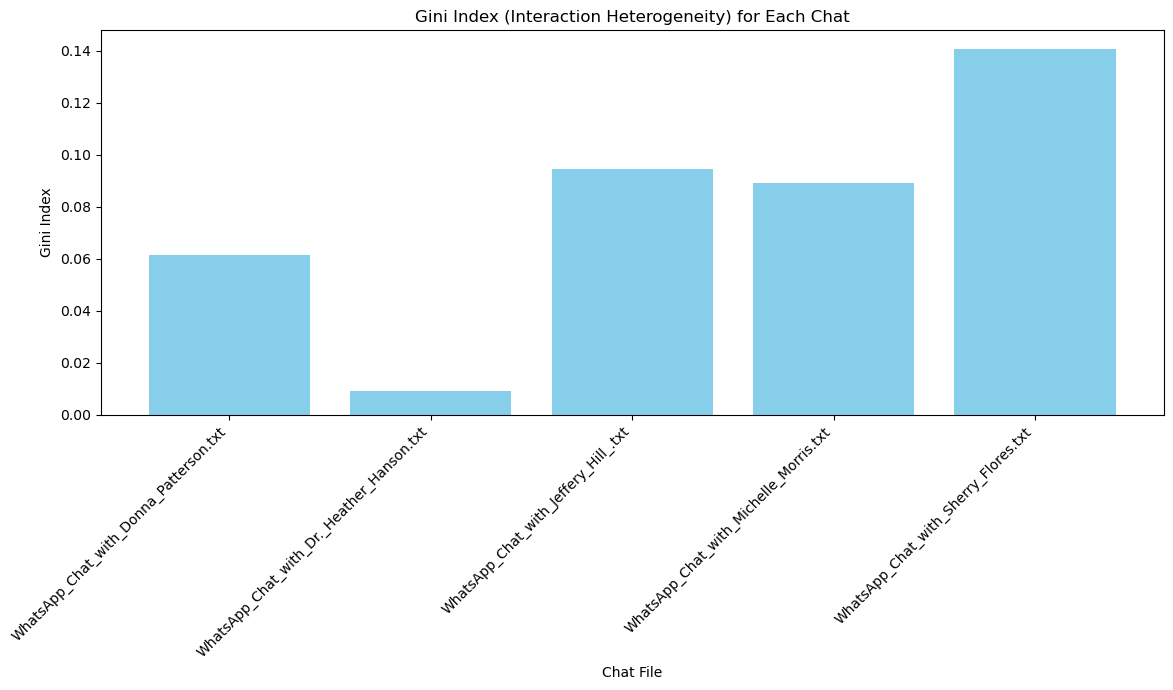

                                   Chat File  Gini Index
0     WhatsApp_Chat_with_Donna_Patterson.txt    0.061361
1  WhatsApp_Chat_with_Dr._Heather_Hanson.txt    0.009295
2       WhatsApp_Chat_with_Jeffery_Hill_.txt    0.094470
3     WhatsApp_Chat_with_Michelle_Morris.txt    0.089045
4       WhatsApp_Chat_with_Sherry_Flores.txt    0.140784


In [18]:
# Process all chats and calculating Gini Index
results = []
for path in file_paths:
    word_counts = calculate_word_counts(path)
    gini_index = calculate_gini_index(word_counts)
    results.append({
        "Chat File": os.path.basename(path),
        "Gini Index": gini_index
    })

# Creating a DataFrame
gini_df = pd.DataFrame(results)

# Displaying the Gini Index results as a bar chart for better visualization
plt.figure(figsize=(12, 7))
plt.bar(gini_df["Chat File"], gini_df["Gini Index"], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Gini Index (Interaction Heterogeneity) for Each Chat")
plt.xlabel("Chat File")
plt.ylabel("Gini Index")
plt.tight_layout()
plt.show()

# Displaying the DataFrame
print(gini_df)


What Does the metric tell (Gini Index)?

The Gini Index measures the difference of communication in each chat. A lower value indicates a more balanced interaction where participants contribute similarly, while a higher value signifies that one participant dominates the conversation.

Interesting Observations:

The Gini Index for Dr. Heather Hanson's chat is the lowest (0.009), indicating a balanced interaction pattern.

The highest Gini Index is in the chat with Sherry Flores (0.141), suggesting a more dominant communication style by one participant.

Other participants, such as Jeffery Hill and Michelle Morris, have intermediate Gini values, indicating moderately balanced interactions.